### Classification modeling of breast cancer data 

In the previous blog, collinearity issues were addressed by removing some of the variables from the data  and PCA was applied to reduce the dimensionality. The reduced data is used here in this blog for modeling breast cancer. Since, we do not know the best model for this purpose, first selected classification model will be compared and later the best will be fitted to the data for prediction purposes. 

The classification models compared are K-nearest Neighbors, Support Vector Classifier, and Logistic Regression.  

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

In [109]:
# loading the raw data
bc=pd.read_csv("C:\data science\project1\BC.csv")
bc.head()  
P=bc.iloc[:,2:32]

In [110]:
# summary stat of the raw data
bc.iloc[:,2:32].describe() 

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [112]:
yd=pd.get_dummies(bc.diagnosis)
y=yd.M
y.head() # response variable

0    1
1    1
2    1
3    1
4    1
Name: M, dtype: uint8

In [113]:
# standardizing and PCA
scaler = StandardScaler()
P_scaled=scaler.fit_transform(P)
P_scaled=pd.DataFrame(P_scaled)
PP=P_scaled.drop(P_scaled.columns[[2, 3, 22, 23, 12, 13]], axis=1) 
pca=PCA(n_components=0.95)
P_pca=pca.fit_transform(PP)
print (P_pca.shape)
print(pca.explained_variance_ratio_) 
print (pca.explained_variance_ratio_.sum())

(569, 11)
[ 0.42661046  0.15932139  0.10294428  0.07788731  0.06489774  0.05015242
  0.02145044  0.0187846   0.01505759  0.01197751  0.01117206]
0.960255820189


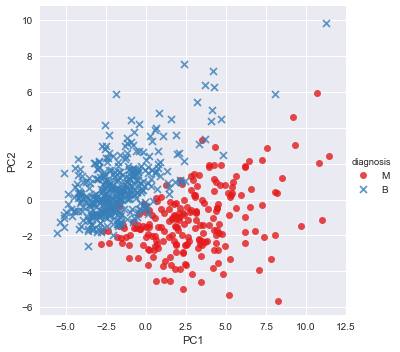

In [107]:
n=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','diagnosis']
d=bc.iloc[:,1:2]  # diagnosis column
#merging the reduced data with diagnosis column
Xy=pd.DataFrame(np.hstack([P_pca,d.as_matrix()]),columns=n)
# plotting the the first 2 pca components against diagnosis
sns.lmplot("PC1", "PC2", hue="diagnosis", data=Xy, fit_reg=False,markers=["o", "x"],palette="Set1")
sns.plt.show()

## Modeling 
From the above plot, we can see that the positive and negative cases (i.e. B and M) have fairly distinctive regions, this makes it easier to fit linear or non-linear classifiers to model the problem. Below, **k-neighbors,Support Vector MAchine(SVM), and Linear Discriminant Analysis (LDA)** classifiers are fit to the data and later results are compared.

#### Splitting the data: training and test 

In [61]:
from sklearn.cross_validation import train_test_split
#predictor X
X=(Xy.iloc[:,0:11]).as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

### 1. K-nearest Neighbors classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import cross_val_score
knn=KNeighborsClassifier()

**Parameter tuning: optimizing the number of neighbors (k)**
* For optimization purposes it is suggested using the training data; and
* for performance estimation or to figure out the best model, the test data will be used.

[ 0.924  0.874  0.937  0.924  0.943  0.925  0.925  0.912  0.918  0.906
  0.906  0.887  0.9    0.887  0.893  0.874  0.893  0.868  0.887  0.868
  0.887  0.875  0.887  0.875  0.881  0.874  0.893  0.862  0.862  0.856
  0.875  0.855  0.862  0.855  0.862  0.849  0.862  0.843  0.85   0.843
  0.843  0.83   0.837  0.83   0.843  0.83   0.837  0.837  0.837]


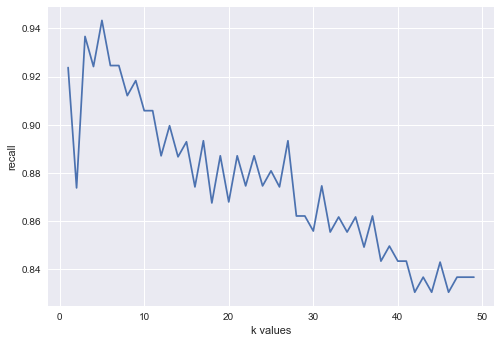

In [15]:
k_range=list(range(1,50))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='recall')
    k_scores.append(scores.mean())
print(np.round(k_scores,3)) # to display scores to 3 decimal places
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores)
plt.xlabel('k values')
plt.ylabel('recall')
plt.show()

* From the above plot the optimal k value is somewhere between 1 and 10. Looking at the scores, at k=5 we have the highest recall/sensitivity.
* We can use a more efficient parameter tuning approach called **GridSearchCV** as shown below which basically automates the search process and it also fits the optimal parameter to the training data.

In [14]:
from sklearn.grid_search import GridSearchCV
k_range=list(range(1,50))
param_grid=dict(n_neighbors=k_range)
scores = ['accuracy', 'recall'] # evaluation scores for selecting best parameter
for sc in scores:
    grid_knn=GridSearchCV(knn,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_knn.fit(X_train,y_train)
    print(grid_knn.best_params_)
    print(np.round(grid_knn.best_score_,3))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Tuning hyper-parameters for accuracy
{'n_neighbors': 6}
0.96
# Tuning hyper-parameters for recall
{'n_neighbors': 5}
0.943


* Here, the optimal n_neighbors according to recall score (sensitivity) is **selected i.e.k=5** instead of k=6. As we are more concerned in predicting cancer cases (M) accurately rather than no-cancer cases (B), we go with results found using recall or sensitivity score.

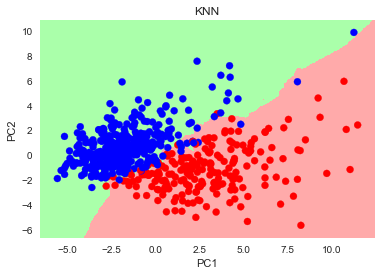

In [16]:
# fitting the optimal model (i.e. knn with k=5 based upon recall score) onto the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
knn.fit(X_train[:,0:2], y_train)
# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])
# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = knn.predict(xy_mesh)
%matplotlib inline
Z = Z.reshape(xx.shape)
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
ax=plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max());plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('KNN')
plt.show()

#### 2. Support Vector Machine (SVM)

In [17]:
from sklearn.cross_validation import cross_val_score
from sklearn.svm import SVC
svc=SVC()
param_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4, 1e-5],'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
scores = ['accuracy', 'recall']
for sc in scores:
    grid=GridSearchCV(svc,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid.fit(X_train,y_train)
    print(grid.best_params_)
    print(np.round(grid.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.979
# Tuning hyper-parameters for recall
{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.962


* Using accuracy and recall as scoring metrics, both give the same model as optimal i.e. {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}. Here below, we fit this model to the data and do visualization of the results.

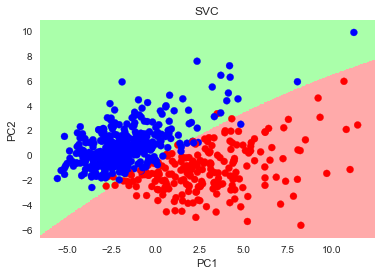

In [114]:
from sklearn import metrics
from sklearn import cross_validation as cv

# fitting the optimal model onto the training data
svc=SVC(C=100,gamma=0.001,kernel='rbf')
svc.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
svc.fit(X_train[:,0:2], y_train)

# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = svc.predict(xy_mesh)
Z = Z.reshape(xx.shape)

#plotting data on decision boundary
%matplotlib inline
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('SVC')
plt.show()

#### 3. Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

lgr = LogisticRegression()

#parameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
scores = ['accuracy', 'recall']
for sc in scores:
    grid_lgr=GridSearchCV(lgr,param_grid,cv=10,scoring=sc,n_jobs=-1)
    print("# Tuning hyper-parameters for %s" % sc)
    grid_lgr.fit(X_train,y_train)
    print(grid_lgr.best_params_)
    print(np.round(grid_lgr.best_score_,3))

# Tuning hyper-parameters for accuracy
{'C': 0.1}
0.979
# Tuning hyper-parameters for recall
{'C': 1}
0.962


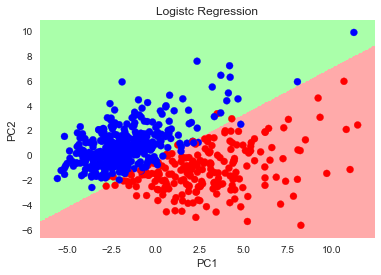

In [20]:
# fitting the optimal model onto the training data
from sklearn import metrics
from sklearn import cross_validation as cv

# fitting the optimal model onto the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)

# for display purposes, we fit the model on the first two components i.e. PC1, and PC2
lgr.fit(X_train[:,0:2], y_train)

# Plotting the decision boundary for all data (both train and test)
# Create color maps
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#AAFFAA','#FFAAAA'])
cmap_bold = ListedColormap(['#0000FF','#FF0000'])

# creating a meshgrid
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h=0.05
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
xy_mesh=np.c_[xx.ravel(), yy.ravel()]
Z = lgr.predict(xy_mesh)
Z = Z.reshape(xx.shape)

%matplotlib inline
#print(Z)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('PC1');plt.ylabel('PC2')
plt.title('Logistc Regression')
plt.show()

SVC and Logistic regression scored similar performance, but we should be careful since the model has not yet tested on test data or on data independent of the one used for training the models. Below, we fit the three models onto the test data (X_test) and compare the predictions (y_predict) with observations (y_test). For this purpose, various evaluation metrics are implemented:


#### Model Selection

KNN:
 confusion matrix
 [[89  1]
 [ 5 48]] 


Confusion matrix plot of KNN classifier


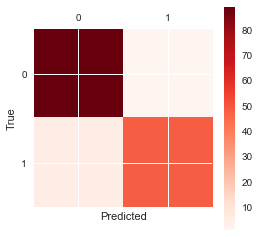


 Classification report 
              precision    recall  f1-score   support

          0       0.95      0.99      0.97        90
          1       0.98      0.91      0.94        53

avg / total       0.96      0.96      0.96       143

#############################################################################
SVC:
 confusion matrix
 [[89  1]
 [ 3 50]] 


Confusion matrix plot of SVC


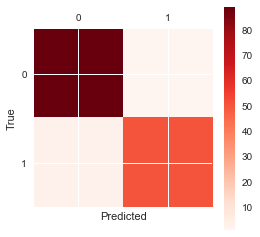


 Classification report 
              precision    recall  f1-score   support

          0       0.97      0.99      0.98        90
          1       0.98      0.94      0.96        53

avg / total       0.97      0.97      0.97       143

#############################################################################
Logistic Regression:
confusion matrix
 [[89  1]
 [ 3 50]] 


Confusion matrix plot of Logistic regression


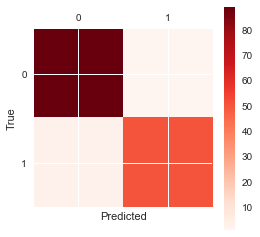


 Classification report 
              precision    recall  f1-score   support

          0       0.97      0.99      0.98        90
          1       0.98      0.94      0.96        53

avg / total       0.97      0.97      0.97       143



In [35]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# KNN
# fitting the knn model on the training data
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn =knn.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_knn)
print('KNN:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of KNN classifier')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_knn))
print ('#############################################################################')

# SVC
# fitting the SVC model on the training data and predicting for test data
svc=SVC(C=100,gamma=0.001,kernel='rbf',probability=True)
svc.fit(X_train, y_train)
y_pred_svc =svc.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_svc)
print('SVC:\n confusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of SVC')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_svc))
print ('#############################################################################')

# Logistic Regression
# fitting the lgr model on the training data
lgr=LogisticRegression(C=1)
lgr.fit(X_train, y_train)
y_pred_lgr =lgr.predict(X_test)
# computing and plotting confusion matrix
c_m = confusion_matrix(y_test, y_pred_lgr)
print('Logistic Regression:\nconfusion matrix\n', c_m,'\n\n')
ax=plt.matshow(c_m,cmap=plt.cm.Reds)
print('Confusion matrix plot of Logistic regression')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
# classification report
print('\n Classification report \n',classification_report(y_test, y_pred_lgr))

* Scores on Malignant cases from each model are summarized as below:



| Model         | Precision  | Recall | f1-score |
| ------------- |:----------:| -----: | --------:|
| KNN           | 0.98       |   0.91 | 0.94     |
| SVC           | 0.98       |   0.94 | 0.96     |
| Logistic      | 0.98       |   0.94 | 0.96     |




** Conclusion:**

* As results show, both SVC and logistic regression are performing equally good. One may choose either of the models on the basis of other factors such as simplicity in parameter tuning and ease of interpritation and so on.
* Threshold of 0.5 is used by default (for binary problems) to convert predicted probabilities into class predictions
* Threshold can be adjusted to increase sensitivity or specificity. Specificity explains how often is the prediction correct when the actual value is negative (0). Sensitivity and specificity have an inverse relationship.
* For this sepcific case, sensitivity is more important so we focus finding the threshold level which can give us the highest sensitivity. 
* We can manually change the threshold level and evaluate results. But instead we can plot ROC curve and see the effect of threshold on sensitivity and specificity. 

#### Effect of classification threshold on model performance

model: KNN
thresholds: [ 2.   1.   0.8  0.6  0.4  0.2  0. ]
tpr:        [ 0.     0.736  0.868  0.906  0.943  0.962  1.   ]
fpr:        [ 0.     0.011  0.011  0.011  0.044  0.222  1.   ]
model: SVC
thresholds: [ 1.     0.771  0.615  0.5    0.49   0.442  0.411  0.364  0.32   0.307  0.   ]
tpr:        [ 0.057  0.925  0.925  0.943  0.943  0.962  0.962  0.981  0.981  1.     1.   ]
fpr:        [ 0.     0.     0.011  0.011  0.022  0.022  0.033  0.033  0.044  0.044  1.   ]
model: Logistic
thresholds: [ 1.     0.737  0.616  0.565  0.461  0.429  0.427  0.375  0.024  0.023  0.   ]
tpr:        [ 0.019  0.925  0.925  0.943  0.943  0.962  0.962  0.981  0.981  1.     1.   ]
fpr:        [ 0.     0.     0.011  0.011  0.033  0.033  0.044  0.044  0.267  0.267  1.   ]


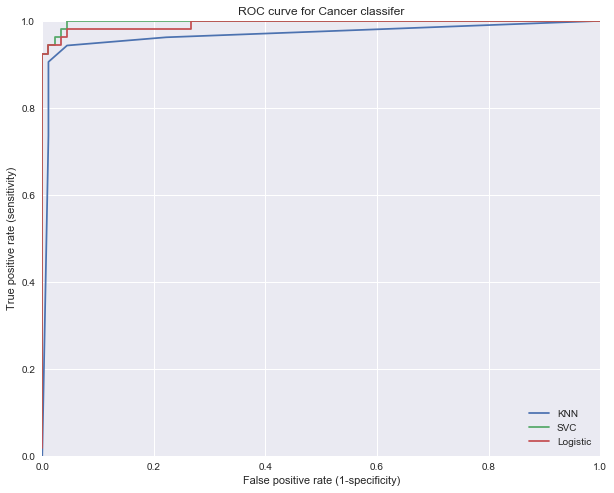

In [104]:
# false positive rate,fpr= FP/(TN+FP) OR fpr=1-specificty, tpr=sensitivity 
y_pred_knn_p =knn.predict_proba(X_test)[:,1]
y_pred_svc_p =svc.predict_proba(X_test)[:,1]
y_pred_lgr_p =lgr.predict_proba(X_test)[:,1]

models=[y_pred_knn_p,y_pred_svc_p,y_pred_lgr_p]
label=['KNN','SVC','Logistic']

# plotting ROC curves
plt.figure(figsize=(10, 8))
m=np.arange(3)
for m in m:
    fpr, tpr,thresholds= metrics.roc_curve(y_test,models[m])
    print('model:',label[m])
    print('thresholds:',np.round(thresholds,3))
    print('tpr:       ',np.round(tpr,3))
    print('fpr:       ',np.round(fpr,3))
    plt.plot(fpr,tpr,label=label[m])
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.0])
plt.title('ROC curve for Cancer classifer')
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (sensitivity)')
plt.legend(loc=4,)

* From the ROC curve, KNN has resulted the least peformance among the three models. SVC and Logistic seem to have the same performance for thresholds ~0.25 and above but for threshold below 0.25 svc performs better than logistic. 
* From these, we can lean to scv as its overall performace is better under various threshold levels. Therefore, 
  * **Optimal model: svc with C=100, gamma=0.001, kernel=rbf, and threshold value of 0.44**
      * by changing the treshold from its default value of 0.5 to 0.44, the sensitivity increases from 0.94 to 0.962. 
  